# COGS 109 - Data Cleaning

<a id='research_question'></a>
# Research Question

What factors (such as grade average, level of difficulty, time commitment, etc.) influence the course/instructor recommendation rate the most at UCSD, based on the data collected from Course and Professor Evaluations (CAPEs)? 
- Additionally, does this relationship differ between STEM and non-STEM courses? Upper/lower? etc.


# Dataset(s)

- Dataset Name: Course and Professor Evaluations (CAPEs)
- Link to the dataset: https://cape.ucsd.edu/responses/Results.aspx
- Number of observations: 60414 observations
 
The variables that we are looking for to judge in the dataset are grade average, level of difficulty, time commitment, and average grades received by the students themselves based on CAPES.

Since getting the data required interaction with the webpage (choosing from the dropdown menu), we scraped the data from the cape.ucsd.edu website using Selenium WebDriver framework to interact with the browser and extract useful information (tables of data). 

# Setup

In [ ]:
# use selenium for data scraping
!pip install selenium

In [ ]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# packages for webscraping
from selenium import webdriver
import time

Information for accessing CAPES website. **login_info.config** is a config file containing SSO username and password. 

In [ ]:
with open("login_info.config", "r") as file:
    username = file.readline().strip("\n")
    password = file.readline().strip("\n")

Interact with CAPES website for logging in. 

In [ ]:
url = "https://cape.ucsd.edu/responses/Results.aspx"

# Create Chrome webdriver and load page
driver = webdriver.Chrome()
driver.get(url)

# Find input fields for username and password
username_input = driver.find_element("xpath", "//input[@name='urn:mace:ucsd.edu:sso:username']")
password_input = driver.find_element("xpath", "//input[@name='urn:mace:ucsd.edu:sso:password']")

# Send login info
username_input.send_keys(username)
password_input.send_keys(password)

# Find and click the login button
login_button = driver.find_element("xpath", "//button[@type='submit']")
login_button.click()

The Two-Step log in (Duo) will require user's own authentication.  

Interact with "https://cape.ucsd.edu/responses/Results.aspx" page.

In [ ]:
# Find the department drop down menu
departments = driver.find_element("id", "ContentPlaceHolder1_ddlDepartments")

# Get all option elements within the select element
options = departments.find_elements("tag name", "option")

Create a function to extract data from each department. 

In [ ]:
def get_table_contents(department):
    
    # Chose department on drop down menu
    department.click()
    search_button = driver.find_element("id", "ContentPlaceHolder1_btnSubmit")
    search_button.click()

    # Wait for page to load
    time.sleep(10)
    
    # Extract data into a pandas DataFrame
    data = pd.DataFrame(pd.read_html(driver.page_source)[0])
    
    return data

In [ ]:
# Get the names of all departments in a list
option_values = [option.get_attribute("value") for option in options]
lowercase_departments = [item.lower() for item in option_values][1:]

In [ ]:
# Create a list to store all tables for all departments
table_dfs = []

# Loop through all departments and extract data for each department
for index, name in enumerate(lowercase_departments):
    index += 1
    
    table_data = get_table_contents(options[index])
    table_df = pd.DataFrame(table_data)
    table_dfs.append(table_df)

# Concatenate all table DataFrames
combined_df = pd.concat(table_dfs, ignore_index=True)

Export extracted data into a .csv file so that we don't have to re-extract every single time. 


In [ ]:
combined_df.to_csv("capes.csv", index = False)

# START FROM HERE!

In [1]:
import pandas as pd
import numpy as np

# Import seaborn and apply plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# packages for webscraping
from selenium import webdriver
import time

In [2]:
# Load data
df = pd.read_csv('capes.csv')

In [3]:
df.head(10)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0%,100.0%,3.61,A (4.00),B+ (3.62)
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0%,100.0%,7.64,B+ (3.57),NaN
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0%,92.9%,3.42,A (4.00),A- (3.99)
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0%,100.0%,4.07,A- (3.80),B+ (3.63)
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0%,75.0%,2.00,A (4.00),NaN
5,"Non, Amy L",ANBI 130 - Biology of Inequality (A),WI23,71,45,84.4%,81.8%,4.28,B+ (3.42),B+ (3.41)
6,"Gagneux, Pascal",ANBI 139 - Evolution of Human Disease (A),WI23,157,71,100.0%,100.0%,3.50,A- (3.71),B+ (3.40)
7,"Wilder, Linnea Lorene",ANBI 143 - The Human Skeleton (A),WI23,33,15,100.0%,93.3%,3.30,A- (3.80),B+ (3.61)
8,"Wilder, Linnea Lorene",ANBI 144 - Human Anatomy (A),WI23,32,14,92.9%,100.0%,4.19,B+ (3.62),B (3.27)
9,"Non, Amy L",ANBI 149 - Social/Behavioral Epigenetics (A),WI23,8,3,100.0%,100.0%,5.17,A (4.00),NaN


# Data Cleaning

#### Identify the properties of the data

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60414 entries, 0 to 60413
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Instructor          60405 non-null  object 
 1   Course              60414 non-null  object 
 2   Term                60414 non-null  object 
 3   Enroll              60414 non-null  int64  
 4   Evals Made          60414 non-null  int64  
 5   Rcmnd Class         60414 non-null  object 
 6   Rcmnd Instr         60414 non-null  object 
 7   Study Hrs/wk        60413 non-null  float64
 8   Avg Grade Expected  58976 non-null  object 
 9   Avg Grade Received  43765 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.6+ MB


,Enroll,Evals Made,Study Hrs/wk
count,60414.000000,60414.000000,60413.000000
mean,78.395289,39.960622,5.623451
std,88.440429,49.314553,2.564658
min,1.000000,3.000000,0.000000
25%,20.000000,9.000000,4.000000
50%,41.000000,20.000000,5.300000
75%,105.000000,51.000000,6.970000
max,1101.000000,588.000000,20.500000


In [5]:
print(df.apply(lambda col: col.unique()))

Instructor            [Shtienberg, Gilad, Smith, Neil Gordon, Braswe...
Course                [ANAR 116 - Sea Level Change - Israel (A), ANA...
Term                  [WI23, FA22, S222, S122, SP22, WI22, FA21, S22...
Enroll                [27, 17, 24, 41, 14, 71, 157, 33, 32, 8, 18, 2...
Evals Made            [9, 7, 15, 23, 4, 45, 71, 14, 3, 13, 22, 16, 1...
Rcmnd Class           [100.0%, 84.4%, 92.9%, 83.3%, 81.8%, 87.5%, 90...
Rcmnd Instr           [100.0%, 92.9%, 75.0%, 81.8%, 93.3%, 83.3%, 77...
Study Hrs/wk          [3.61, 7.64, 3.42, 4.07, 2.0, 4.28, 3.5, 3.3, ...
Avg Grade Expected    [A (4.00), B+ (3.57), A- (3.80), B+ (3.42), A-...
Avg Grade Received    [B+ (3.62), nan, A- (3.99), B+ (3.63), B+ (3.4...
dtype: object


In [6]:
# Check for NaN values
df.isnull().sum()

Instructor                9
Course                    0
Term                      0
Enroll                    0
Evals Made                0
Rcmnd Class               0
Rcmnd Instr               0
Study Hrs/wk              1
Avg Grade Expected     1438
Avg Grade Received    16649
dtype: int64

In [7]:
#Impute Avg Grade Received Rows with NaN with Avg Grade Expected
df['Avg Grade Received'].fillna(df['Avg Grade Expected'], inplace=True)

In [8]:
#Now let's check how many NaNs we have remaining
df.isnull().sum()

Instructor               9
Course                   0
Term                     0
Enroll                   0
Evals Made               0
Rcmnd Class              0
Rcmnd Instr              0
Study Hrs/wk             1
Avg Grade Expected    1438
Avg Grade Received    1096
dtype: int64

In [9]:
# Check if there are duplicate values in dataset
df.duplicated().sum()

3

In [10]:
# Check for duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Print the indexes of the duplicate rows
duplicates

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
21545,"Jacob-Almeida, Rachel","EDS 117 - Language, Culture & Education (A)",SU09,46,28,75.0%,57.1%,8.93,NaN,NaN
21546,"Jacob-Almeida, Rachel","EDS 117 - Language, Culture & Education (A)",SU09,46,28,75.0%,57.1%,8.93,NaN,NaN
49223,"Anderson, John Charles",MGT 4 - Financial Accounting (A),SU10,9,14,85.7%,71.4%,6.07,B+ (3.50),B+ (3.50)
49224,"Anderson, John Charles",MGT 4 - Financial Accounting (A),SU10,9,14,85.7%,71.4%,6.07,B+ (3.50),B+ (3.50)
49225,"Willoughby, Michael Gene",MGT 4 - Financial Accounting (A),SU10,30,14,92.9%,92.9%,5.93,NaN,NaN
49226,"Willoughby, Michael Gene",MGT 4 - Financial Accounting (A),SU10,30,14,92.9%,92.9%,5.93,NaN,NaN


In [11]:
# drop our duplicated values
df.drop_duplicates(inplace=True)

In [12]:
df

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0%,100.0%,3.61,A (4.00),B+ (3.62)
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0%,100.0%,7.64,B+ (3.57),B+ (3.57)
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0%,92.9%,3.42,A (4.00),A- (3.99)
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0%,100.0%,4.07,A- (3.80),B+ (3.63)
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0%,75.0%,2.00,A (4.00),A (4.00)
...,...,...,...,...,...,...,...,...,...,...
60409,"Adler, Steven",WCWP 10A - The Writing Course A (9),FA10,15,10,60.0%,90.0%,8.70,B+ (3.30),B+ (3.30)
60410,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (B),FA10,19,12,66.7%,100.0%,7.50,B (3.08),B (3.08)
60411,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (C),FA10,21,12,91.7%,100.0%,7.59,B (3.09),B- (2.83)
60412,"Chapin, Benjamin Nodin",WCWP 10B - The Writing Course B (A),SU10,14,6,66.7%,100.0%,8.17,B+ (3.33),B+ (3.33)


In [13]:
df = df.reset_index(drop=True)
df

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0%,100.0%,3.61,A (4.00),B+ (3.62)
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0%,100.0%,7.64,B+ (3.57),B+ (3.57)
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0%,92.9%,3.42,A (4.00),A- (3.99)
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0%,100.0%,4.07,A- (3.80),B+ (3.63)
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0%,75.0%,2.00,A (4.00),A (4.00)
...,...,...,...,...,...,...,...,...,...,...
60406,"Adler, Steven",WCWP 10A - The Writing Course A (9),FA10,15,10,60.0%,90.0%,8.70,B+ (3.30),B+ (3.30)
60407,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (B),FA10,19,12,66.7%,100.0%,7.50,B (3.08),B (3.08)
60408,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (C),FA10,21,12,91.7%,100.0%,7.59,B (3.09),B- (2.83)
60409,"Chapin, Benjamin Nodin",WCWP 10B - The Writing Course B (A),SU10,14,6,66.7%,100.0%,8.17,B+ (3.33),B+ (3.33)


Describe your data cleaning steps here.

Step 1: Change 'Rcmnd Class' and ''Rcmnd Instr' 's values from percentage/string to floats. (example: '100.0%' to 100.0)

Step 2: Change Avg Grade Received and Avg Grade Expected from letter grades to floats. (example: 'A (4.00)' to 4.00)

Step 3: Deleted all rows with 'NaN' variable as it is incomplete data that would negatively affect our statistical analysis.

In [14]:
# Function changes percentages to floats
def p_to_num(string):
    return float(string.strip('%'))

In [15]:
df['Rcmnd Class'] = df['Rcmnd Class'].apply(p_to_num)
df['Rcmnd Instr'] = df['Rcmnd Instr'].apply(p_to_num)

In [16]:
# Function changes letter grades to floats
def grade_num(string):
    if string == 'NaN' or type(string) == float:
        return string
    else:
        start_index = string.find('(')
        end_index = string.rfind(')')
        extracted_content = string[start_index + 1:end_index]
        stripped_string = extracted_content.replace('(', '').replace(')', '')
        return float(stripped_string)

In [17]:
df['Avg Grade Expected'] = df['Avg Grade Expected'].apply(grade_num)
df['Avg Grade Received'] = df['Avg Grade Received'].apply(grade_num)

In [18]:
df.head(10)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.57
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,4.00
5,"Non, Amy L",ANBI 130 - Biology of Inequality (A),WI23,71,45,84.4,81.8,4.28,3.42,3.41
6,"Gagneux, Pascal",ANBI 139 - Evolution of Human Disease (A),WI23,157,71,100.0,100.0,3.50,3.71,3.40
7,"Wilder, Linnea Lorene",ANBI 143 - The Human Skeleton (A),WI23,33,15,100.0,93.3,3.30,3.80,3.61
8,"Wilder, Linnea Lorene",ANBI 144 - Human Anatomy (A),WI23,32,14,92.9,100.0,4.19,3.62,3.27
9,"Non, Amy L",ANBI 149 - Social/Behavioral Epigenetics (A),WI23,8,3,100.0,100.0,5.17,4.00,4.00


We want to drop all rows with 'NaN' in its data, as this is due to a lack of evaluations made on the class. 
Incomplete information will cause problems to our statistical analysis.

In [19]:
df = df.dropna()

In [20]:
df.head(10)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.57
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,4.00
5,"Non, Amy L",ANBI 130 - Biology of Inequality (A),WI23,71,45,84.4,81.8,4.28,3.42,3.41
6,"Gagneux, Pascal",ANBI 139 - Evolution of Human Disease (A),WI23,157,71,100.0,100.0,3.50,3.71,3.40
7,"Wilder, Linnea Lorene",ANBI 143 - The Human Skeleton (A),WI23,33,15,100.0,93.3,3.30,3.80,3.61
8,"Wilder, Linnea Lorene",ANBI 144 - Human Anatomy (A),WI23,32,14,92.9,100.0,4.19,3.62,3.27
9,"Non, Amy L",ANBI 149 - Social/Behavioral Epigenetics (A),WI23,8,3,100.0,100.0,5.17,4.00,4.00


In [21]:
#Make a copy of existing data
new_df = df
new_df = new_df.reset_index(drop=True)


In [22]:
def classify(string):
    string = string[0:5] #Only takes the first 4 letters of the course
    string = string.lower().strip()
    output = ''.join(map(lambda c: '' if c in '0123456789' else c, string)) #Eliminate any numbers
    return output.strip()

In [23]:
#Apply function for the whole dataframe
new_df['Department'] = new_df['Course'].apply(classify)


In [24]:
all_courses = new_df['Department'].unique()
all_courses

array(['anar', 'anbi', 'ansc', 'anth', 'anld', 'beng', 'bibc', 'bicd',
       'bieb', 'bild', 'bimm', 'bipn', 'bisp', 'sio', 'cat', 'ceng',
       'cgs', 'chem', 'chin', 'cogs', 'dsgn', 'comm', 'cocu', 'cogn',
       'cohi', 'comt', 'cosf', 'cont', 'cse', 'doc', 'ece', 'eng', 'econ',
       'eds', 'envr', 'erc', 'hmnr', 'esys', 'ethn', 'film', 'fpmu',
       'hdp', 'hiaf', 'hiea', 'hieu', 'hila', 'hild', 'hine', 'hisc',
       'hito', 'hius', 'higl', 'hum', 'icam', 'intl', 'japn', 'jwsp',
       'juda', 'lati', 'laws', 'lign', 'lihl', 'lisp', 'liab', 'ligm',
       'liit', 'lipo', 'ltaf', 'ltch', 'ltcs', 'ltea', 'lten', 'lteu',
       'ltfr', 'ltgk', 'ltgm', 'ltit', 'ltko', 'ltla', 'ltru', 'ltsp',
       'ltth', 'ltwl', 'ltwr', 'ltam', 'mae', 'math', 'mmw', 'muir',
       'mus', 'nano', 'phil', 'phys', 'poli', 'soci', 'psyc', 'reli',
       'rev', 'mgt', 'elwr', 'se', 'se l', 'soce', 'soca', 'socb', 'socc',
       'socd', 'socl', 'glbh', 'stpa', 'sxth', 'tdac', 'tdde', 'tddm',
       '

In [25]:
#Create list of only STEM courses
stem = ['beng',
 'bibc',
 'bicd',
 'bieb',
 'bild',
 'bimm',
 'bipn',
 'bisp',
 'sio',
 'ceng',
 'chem',
 'cogs',
 'cse',
 'ece',
 'eng',
 'envr',
 'erc',
 'esys',
 'fpmu',
 'mae',
 'math',
 'nano',
 'phys',
 'soci',
 'se',
 'glbh']

In [26]:
#create non-STEM list
non_stem = []
for i in all_courses:
    if i not in stem:
        non_stem.append(i)
non_stem

['anar',
 'anbi',
 'ansc',
 'anth',
 'anld',
 'cat',
 'cgs',
 'chin',
 'dsgn',
 'comm',
 'cocu',
 'cogn',
 'cohi',
 'comt',
 'cosf',
 'cont',
 'doc',
 'econ',
 'eds',
 'hmnr',
 'ethn',
 'film',
 'hdp',
 'hiaf',
 'hiea',
 'hieu',
 'hila',
 'hild',
 'hine',
 'hisc',
 'hito',
 'hius',
 'higl',
 'hum',
 'icam',
 'intl',
 'japn',
 'jwsp',
 'juda',
 'lati',
 'laws',
 'lign',
 'lihl',
 'lisp',
 'liab',
 'ligm',
 'liit',
 'lipo',
 'ltaf',
 'ltch',
 'ltcs',
 'ltea',
 'lten',
 'lteu',
 'ltfr',
 'ltgk',
 'ltgm',
 'ltit',
 'ltko',
 'ltla',
 'ltru',
 'ltsp',
 'ltth',
 'ltwl',
 'ltwr',
 'ltam',
 'mmw',
 'muir',
 'mus',
 'phil',
 'poli',
 'psyc',
 'reli',
 'rev',
 'mgt',
 'elwr',
 'se l',
 'soce',
 'soca',
 'socb',
 'socc',
 'socd',
 'socl',
 'stpa',
 'sxth',
 'tdac',
 'tdde',
 'tddm',
 'tddr',
 'tdge',
 'tdhd',
 'tdht',
 'tdmv',
 'tdpr',
 'tdpw',
 'tdtr',
 'tdpf',
 'tdch',
 'tmc',
 'gss',
 'tws',
 'usp',
 'vis',
 'warr',
 'wcwp']

In [27]:
#funtion to assign the course to STEM or non_STEM
def category(string):
    if string in stem:
        return 'STEM'
    else:
        return 'Non-STEM'

In [28]:
new_df['Category'] = new_df['Department'].apply(category)
new_df.head(5)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62,anar,Non-STEM
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.57,anar,Non-STEM
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99,anar,Non-STEM
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63,anar,Non-STEM
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,4.00,anar,Non-STEM


In [29]:
#Create 2 dataframes by separating into STEM and Non-STEM
non_stem_df = new_df[new_df["Category"]=='Non-STEM']
non_stem_df.head(5)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62,anar,Non-STEM
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.57,anar,Non-STEM
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99,anar,Non-STEM
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63,anar,Non-STEM
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,4.00,anar,Non-STEM


In [30]:
stem_df = new_df[new_df["Category"]=='STEM']
stem_df.head(5)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category
1141,"Sah, Robert Lie-Yuan",BENG 1 - Introduction to Bioengineering (A),WI23,157,88,69.4,76.5,3.17,3.57,3.57,beng,STEM
1142,"Valdez-Jasso, Daniela",BENG 112A - Soft Tissue Biomechanics (A),WI23,65,21,81.0,100.0,6.69,3.24,2.86,beng,STEM
1143,"Taylor Amos, Alyssa C",BENG 119B - Design Implmntatn Biomechanics (A),WI23,22,5,100.0,100.0,6.10,4.00,3.87,beng,STEM
1144,"Wheeler, Bruce Christopher",BENG 119B - Design Implmntatn Biomechanics (A),WI23,22,5,100.0,100.0,6.10,4.00,3.87,beng,STEM
1145,"Huang, Xiaohua",BENG 120 - Org Chem-Structural & Design (A),WI23,56,25,68.0,64.0,4.82,3.44,3.66,beng,STEM


In [31]:
#Function to classify upper or lower div class
def division(course):
    if isinstance(course, str):
        course_number = ''.join(filter(str.isdigit, course))
        if course_number:
            course_number = int(course_number)
            if course_number >= 100:
                return 'Upper'
            else:
                return 'Lower'
    return 'Unknown'

In [32]:
#test
division('BENG 12 - Org Chem-Structural & Design (A)')

'Lower'

In [33]:
new_df['Division'] = new_df['Course'].apply(division)
new_df

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category,Division
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62,anar,Non-STEM,Upper
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.57,anar,Non-STEM,Upper
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99,anar,Non-STEM,Upper
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63,anar,Non-STEM,Upper
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,4.00,anar,Non-STEM,Upper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58961,"Adler, Steven",WCWP 10A - The Writing Course A (9),FA10,15,10,60.0,90.0,8.70,3.30,3.30,wcwp,Non-STEM,Upper
58962,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (B),FA10,19,12,66.7,100.0,7.50,3.08,3.08,wcwp,Non-STEM,Lower
58963,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (C),FA10,21,12,91.7,100.0,7.59,3.09,2.83,wcwp,Non-STEM,Lower
58964,"Chapin, Benjamin Nodin",WCWP 10B - The Writing Course B (A),SU10,14,6,66.7,100.0,8.17,3.33,3.33,wcwp,Non-STEM,Lower


In [34]:
#Difference in Avg Grade Expected and Received
new_df['Difference'] = abs(new_df['Avg Grade Expected'] - new_df['Avg Grade Received'])
new_df.head(5)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category,Division,Difference
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62,anar,Non-STEM,Upper,0.38
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.57,anar,Non-STEM,Upper,0.00
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99,anar,Non-STEM,Upper,0.01
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63,anar,Non-STEM,Upper,0.17
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,4.00,anar,Non-STEM,Upper,0.00


In [35]:
def extract_term(text):
    TERMS = { "WI": 1, "SP": 2, "S1": 3, "S2": 4, "S3": 5, "FA": 6, "SU" : 7}
    
    term = text[:2]
    term = TERMS[term]
    
    return term


In [36]:
def extract_year(text):
    year = text[2:]
    year = int("20" + year)
    return year

In [37]:
new_df['Term_num'] = new_df['Term'].apply(extract_term)
new_df['Year'] = new_df['Term'].apply(extract_year)
new_df.head(3)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category,Division,Difference,Term_num,Year
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62,anar,Non-STEM,Upper,0.38,1,2023
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.57,anar,Non-STEM,Upper,0.00,1,2023
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99,anar,Non-STEM,Upper,0.01,1,2023


In [38]:
new_order = ['Instructor', 'Course', 'Term_num', 'Year' ,'Evals Made', 'Enroll', 'Rcmnd Class', 'Rcmnd Instr',
            'Study Hrs/wk', 'Avg Grade Expected', 'Avg Grade Received','Difference', 'Department', 'Category',
             'Division'
            ]

In [39]:
#rearrange columns
final_df = new_df.loc[:, new_order]
final_df.head(3)

,Instructor,Course,Term_num,Year,Evals Made,Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Difference,Department,Category,Division
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),1,2023,9,27,100.0,100.0,3.61,4.00,3.62,0.38,anar,Non-STEM,Upper
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),1,2023,7,17,100.0,100.0,7.64,3.57,3.57,0.00,anar,Non-STEM,Upper
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),1,2023,15,24,100.0,92.9,3.42,4.00,3.99,0.01,anar,Non-STEM,Upper


In [40]:
final_df

,Instructor,Course,Term_num,Year,Evals Made,Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Difference,Department,Category,Division
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),1,2023,9,27,100.0,100.0,3.61,4.00,3.62,0.38,anar,Non-STEM,Upper
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),1,2023,7,17,100.0,100.0,7.64,3.57,3.57,0.00,anar,Non-STEM,Upper
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),1,2023,15,24,100.0,92.9,3.42,4.00,3.99,0.01,anar,Non-STEM,Upper
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),1,2023,23,41,100.0,100.0,4.07,3.80,3.63,0.17,anar,Non-STEM,Upper
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),1,2023,4,14,100.0,75.0,2.00,4.00,4.00,0.00,anar,Non-STEM,Upper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58961,"Adler, Steven",WCWP 10A - The Writing Course A (9),6,2010,10,15,60.0,90.0,8.70,3.30,3.30,0.00,wcwp,Non-STEM,Upper
58962,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (B),6,2010,12,19,66.7,100.0,7.50,3.08,3.08,0.00,wcwp,Non-STEM,Lower
58963,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (C),6,2010,12,21,91.7,100.0,7.59,3.09,2.83,0.26,wcwp,Non-STEM,Lower
58964,"Chapin, Benjamin Nodin",WCWP 10B - The Writing Course B (A),7,2010,6,14,66.7,100.0,8.17,3.33,3.33,0.00,wcwp,Non-STEM,Lower


In [41]:
from scipy import stats
from scipy.stats import ttest_ind

stem_df = final_df[final_df['Category'] == 'STEM']
non_stem_df = final_df[final_df['Category'] == 'Non-STEM']

t_stat_class, p_value_class = ttest_ind(stem_df['Rcmnd Class'], non_stem_df['Rcmnd Class'])
t_stat_instr, p_value_instr = ttest_ind(stem_df['Rcmnd Instr'], non_stem_df['Rcmnd Instr'])
t_stat_class_grade, p_value_class_grade = stats.ttest_ind(df['Avg Grade Received'], df['Rcmnd Class'])
t_stat_instr_grade, p_value_instr_grade = stats.ttest_ind(df['Avg Grade Received'], df['Rcmnd Instr'])
t_stat_class_study, p_value_class_study = stats.ttest_ind(df['Study Hrs/wk'], df['Rcmnd Class'])
t_stat_instr_study, p_value_instr_study = stats.ttest_ind(df['Study Hrs/wk'], df['Rcmnd Instr'])
# Print the results
print('Hypothesis Test for stem and non stem of Rcmnd Class:')
print(f'T-statistic: {t_stat_class:}, p-value: {p_value_class:}')
print('')

print('Hypothesis Test for stem and non stem of Rcmnd Instr:')
print(f'T-statistic: {t_stat_instr:}, p-value: {p_value_instr:}')
print('')

print('Hypothesis Test for avg grade received of Rcmnd Class:')
print(f'T-statistic: {t_stat_class_grade:}, p-value: {p_value_class_grade:}')
print('')

print('Hypothesis Test for avg grade received of Rcmnd Instr:')
print(f'T-statistic: {t_stat_instr_grade:}, p-value: {p_value_instr_grade:}')
print('')

print('Hypothesis Test for study hour f Rcmnd class:')
print(f'T-statistic: {t_stat_class_study:}, p-value: {p_value_class_study:}')
print('')

print('Hypothesis Test for study hour f Rcmnd Instr:')
print(f'T-statistic: {t_stat_instr_study:}, p-value: {p_value_instr_study:}')
print('')

Hypothesis Test for stem and non stem of Rcmnd Class:
T-statistic: -34.273405958037635, p-value: 6.351340572323829e-255

Hypothesis Test for stem and non stem of Rcmnd Instr:
T-statistic: -44.25365250464347, p-value: 0.0

Hypothesis Test for avg grade received of Rcmnd Class:
T-statistic: -1658.6848324032003, p-value: 0.0

Hypothesis Test for avg grade received of Rcmnd Instr:
T-statistic: -1458.7219632941487, p-value: 0.0

Hypothesis Test for study hour f Rcmnd class:
T-statistic: -1582.978141055331, p-value: 0.0

Hypothesis Test for study hour f Rcmnd Instr:
T-statistic: -1398.488377290455, p-value: 0.0



these two more negative t-value indicates that recommendation of class and instructor for Stem is lower than non-stem.

we can see that both p-value is a number very close or even just be 0, which represents that it is statistically significant feature for stem or non stem would impact the recommandation rate.

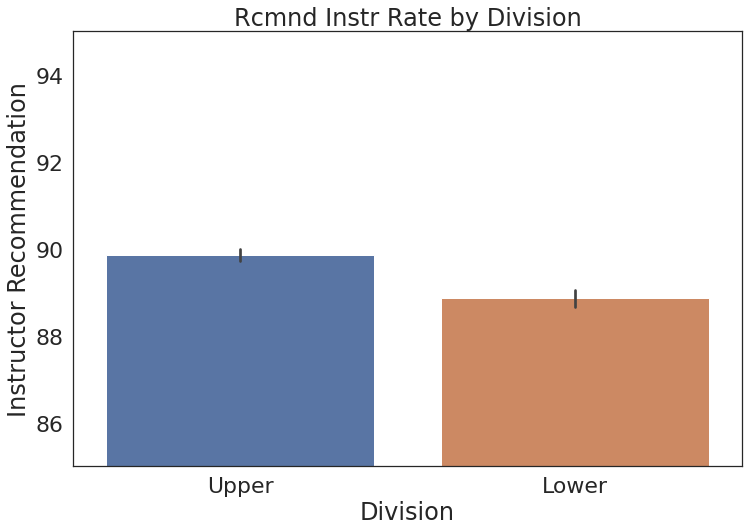

In [42]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Division', y='Rcmnd Instr', data=final_df)
plt.xlabel('Division')
plt.ylabel('Instructor Recommendation')
plt.title('Rcmnd Instr Rate by Division')
plt.ylim(85, 95) 
plt.show()

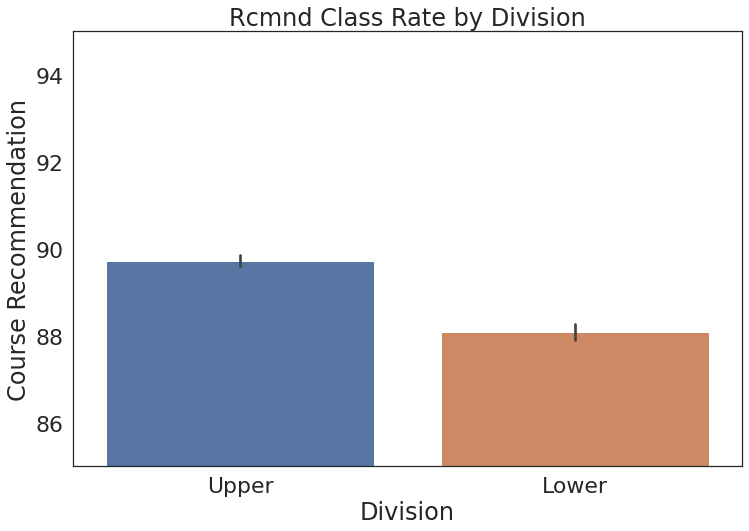

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='Rcmnd Class', data=final_df)
plt.xlabel('Division')
plt.ylabel('Course Recommendation')
plt.title('Rcmnd Class Rate by Division')
plt.ylim(85, 95) 
plt.show()

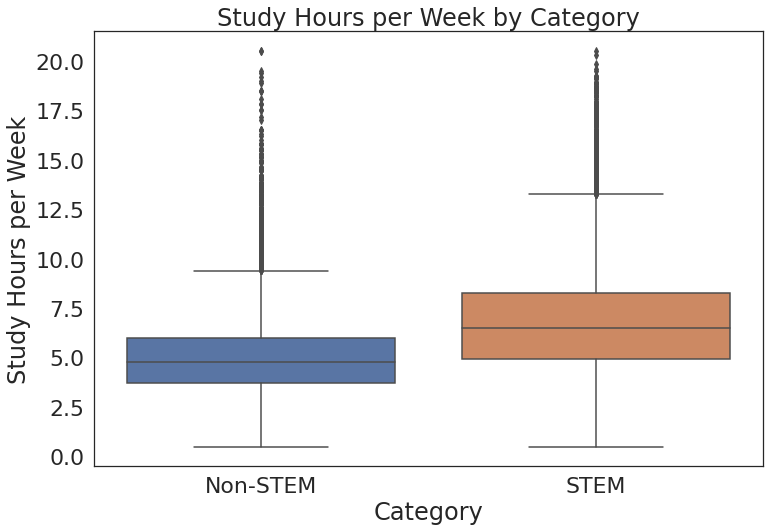

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Study Hrs/wk', data=final_df)
plt.xlabel('Category')
plt.ylabel('Study Hours per Week')
plt.title('Study Hours per Week by Category')
plt.show()

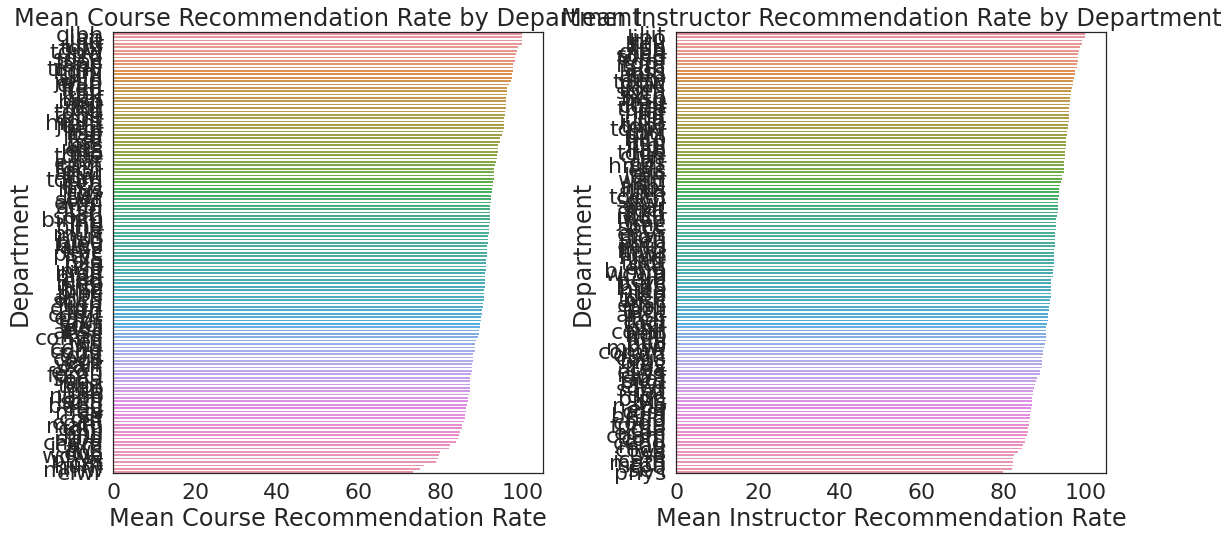

In [45]:
course_stats = final_df.groupby('Department')['Rcmnd Class'].mean().reset_index()
instructor_stats = final_df.groupby('Department')['Rcmnd Instr'].mean().reset_index()

course_stats = course_stats.sort_values('Rcmnd Class', ascending=False)
instructor_stats = instructor_stats.sort_values('Rcmnd Instr', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


sns.barplot(x='Rcmnd Class', y='Department', data=course_stats, ax=ax1, order=course_stats['Department'])
ax1.set_xlabel('Mean Course Recommendation Rate')
ax1.set_ylabel('Department')
ax1.set_title('Mean Course Recommendation Rate by Department')

sns.barplot(x='Rcmnd Instr', y='Department', data=instructor_stats, ax=ax2, order=instructor_stats['Department'])
ax2.set_xlabel('Mean Instructor Recommendation Rate')
ax2.set_ylabel('Department')
ax2.set_title('Mean Instructor Recommendation Rate by Department')
plt.tight_layout()

# Show the plot
plt.show()



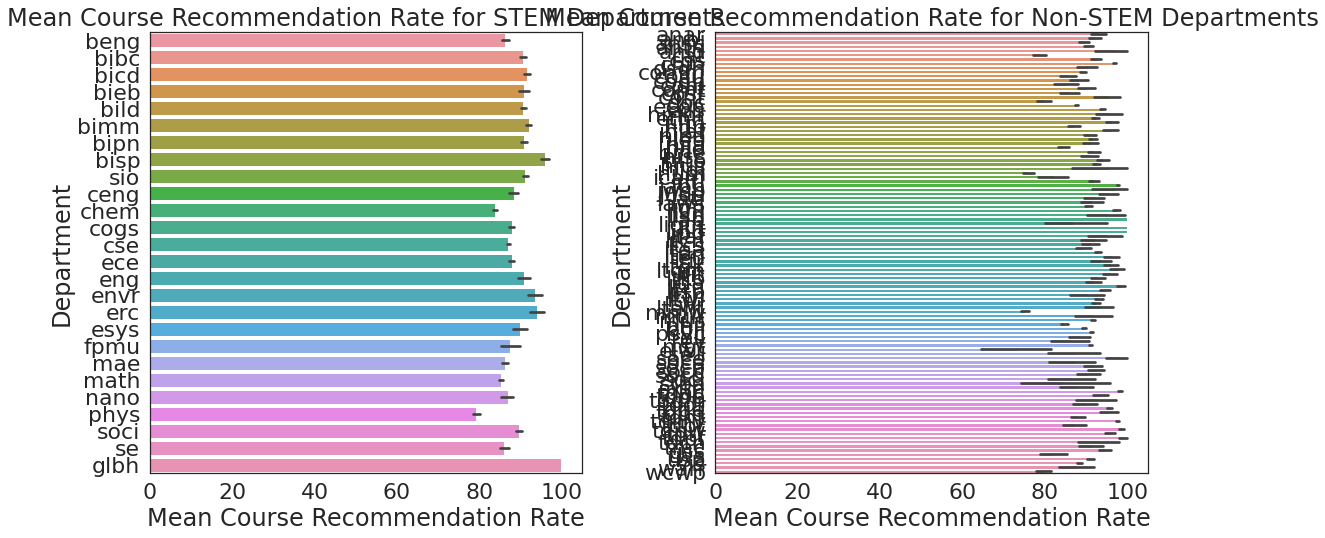

In [46]:
stem_departments = final_df[final_df['Department'].isin(stem)]
non_stem_departments = final_df[final_df['Department'].isin(non_stem)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(x='Rcmnd Class', y='Department', data=stem_departments, ax=ax1)
ax1.set_xlabel('Mean Course Recommendation Rate')
ax1.set_ylabel('Department')
ax1.set_title('Mean Course Recommendation Rate for STEM Departments')


sns.barplot(x='Rcmnd Class', y='Department', data=non_stem_departments, ax=ax2)
ax2.set_xlabel('Mean Course Recommendation Rate')
ax2.set_ylabel('Department')
ax2.set_title('Mean Course Recommendation Rate for Non-STEM Departments')
plt.tight_layout()

plt.show()

In [47]:
#!pip install mlxtend


In [48]:
# One-hot encode 'Category' and 'Division' columns
category_encoded = pd.get_dummies(final_df['Category'], prefix='Category')
division_encoded = pd.get_dummies(final_df['Division'], prefix='Division')

final_df_encoded = pd.concat([final_df.drop(['Category', 'Division'], axis=1), category_encoded, division_encoded], axis=1)


In [49]:
final_df_encoded

,Instructor,Course,Term_num,Year,Evals Made,Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Difference,Department,Category_Non-STEM,Category_STEM,Division_Lower,Division_Upper
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),1,2023,9,27,100.0,100.0,3.61,4.00,3.62,0.38,anar,1,0,0,1
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),1,2023,7,17,100.0,100.0,7.64,3.57,3.57,0.00,anar,1,0,0,1
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),1,2023,15,24,100.0,92.9,3.42,4.00,3.99,0.01,anar,1,0,0,1
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),1,2023,23,41,100.0,100.0,4.07,3.80,3.63,0.17,anar,1,0,0,1
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),1,2023,4,14,100.0,75.0,2.00,4.00,4.00,0.00,anar,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58961,"Adler, Steven",WCWP 10A - The Writing Course A (9),6,2010,10,15,60.0,90.0,8.70,3.30,3.30,0.00,wcwp,1,0,0,1
58962,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (B),6,2010,12,19,66.7,100.0,7.50,3.08,3.08,0.00,wcwp,1,0,1,0
58963,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (C),6,2010,12,21,91.7,100.0,7.59,3.09,2.83,0.26,wcwp,1,0,1,0
58964,"Chapin, Benjamin Nodin",WCWP 10B - The Writing Course B (A),7,2010,6,14,66.7,100.0,8.17,3.33,3.33,0.00,wcwp,1,0,1,0


In [50]:
import statsmodels.api as sm


# Select the independent variables (features) and the dependent variable (target)
X = final_df_encoded[['Term_num', 'Year','Enroll', 'Evals Made', 'Study Hrs/wk', 'Avg Grade Expected', 'Avg Grade Received', 'Difference', 'Category_Non-STEM', 'Category_STEM', 'Division_Lower', 'Division_Upper']]
y = final_df_encoded['Rcmnd Class']

# Add a constant column to the independent variables matrix
X = sm.add_constant(X)

# Fit the multilinear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())



/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            Rcmnd Class   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1660.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        04:51:34   Log-Likelihood:            -2.2555e+05
No. Observations:               58966   AIC:                         4.511e+05
Df Residuals:                   58955   BIC:                         4.512e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -79.9810     10

In [51]:
# Select the independent variables (features) and the dependent variable (target)
X = final_df_encoded[['Term_num', 'Year','Enroll', 'Evals Made', 'Study Hrs/wk', 'Avg Grade Expected', 'Avg Grade Received', 'Difference', 'Category_Non-STEM', 'Category_STEM', 'Division_Lower', 'Division_Upper']]
y = final_df_encoded['Rcmnd Instr']

# Add a constant column to the independent variables matrix
X = sm.add_constant(X)

# Fit the multilinear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            Rcmnd Instr   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1191.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        04:51:34   Log-Likelihood:            -2.3526e+05
No. Observations:               58966   AIC:                         4.705e+05
Df Residuals:                   58955   BIC:                         4.706e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -185.3409     12

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Initialize the forward sequential feature selector
selector_forward = SequentialFeatureSelector(model, k_features='best', forward=True, scoring='r2', cv=5)

##### Forward selection #####
selector_forward.fit(X, y)

# Get the selected feature names
selected_features_forward = list(X.columns[list(selector_forward.k_feature_idx_)])

# Initialize the backward sequential feature selector
selector_backward = SequentialFeatureSelector(model, k_features='best', forward=False, scoring='r2', cv=5)

##### Backward selection #####
selector_backward.fit(X, y)

# Get the selected feature names
selected_features_backward = list(X.columns[list(selector_backward.k_feature_idx_)])

# Print the selected features
print("Forward Selection:",selected_features_forward)

print("\nBackward Selection:",selected_features_backward)


Forward Selection: ['Term_num', 'Year', 'Enroll', 'Evals Made', 'Study Hrs/wk', 'Avg Grade Expected', 'Avg Grade Received', 'Difference', 'Division_Upper']

Backward Selection: ['Term_num', 'Year', 'Enroll', 'Evals Made', 'Avg Grade Expected', 'Avg Grade Received', 'Difference', 'Division_Lower', 'Division_Upper']


In [53]:
# Select the independent variables (features) and the dependent variable (target)
X = final_df_encoded[['Term_num', 'Year','Enroll', 'Evals Made', 'Study Hrs/wk', 'Avg Grade Expected', 'Avg Grade Received', 'Difference', 'Category_Non-STEM', 'Category_STEM', 'Division_Lower', 'Division_Upper']]
y2 = final_df_encoded['Rcmnd Class']

# Add a constant column to the independent variables matrix
X = sm.add_constant(X)

# Fit the multilinear regression model
model2 = sm.OLS(y2, X)
results2 = model2.fit()

# Print the summary of the regression results
print(results2.summary())


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            Rcmnd Class   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1660.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        04:54:11   Log-Likelihood:            -2.2555e+05
No. Observations:               58966   AIC:                         4.511e+05
Df Residuals:                   58955   BIC:                         4.512e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -79.9810     10

In [54]:
# Initialize the linear regression model
model2 = LinearRegression()

# Initialize the forward sequential feature selector
selector_forward2 = SequentialFeatureSelector(model2, k_features='best', forward=True, scoring='r2', cv=5)

##### Forward selection #####
selector_forward2.fit(X, y2)

# Get the selected feature names
selected_features_forward2 = list(X.columns[list(selector_forward2.k_feature_idx_)])

# Initialize the backward sequential feature selector
selector_backward2 = SequentialFeatureSelector(model2, k_features='best', forward=False, scoring='r2', cv=5)

##### Backward selection #####
selector_backward2.fit(X, y2)

# Get the selected feature names
selected_features_backward2 = list(X.columns[list(selector_backward2.k_feature_idx_)])

# Print the selected features
print("Forward Selection:",selected_features_forward2)

print("\nBackward Selection:",selected_features_backward2)



Forward Selection: ['const', 'Year', 'Enroll', 'Evals Made', 'Avg Grade Expected', 'Avg Grade Received', 'Difference']

Backward Selection: ['Year', 'Enroll', 'Evals Made', 'Avg Grade Expected', 'Avg Grade Received', 'Difference']
